In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

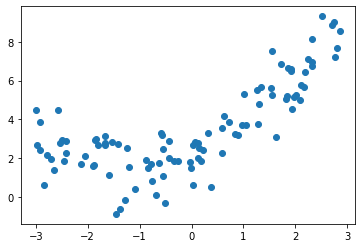

In [2]:
X = 6 * np.random.rand(100, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
plt.plot(X, Y, 'o')

## Polynomial Features
Reduces a polynomial data to linear data with a feature per degree. If degree is 2, then there will be 2 features generated.

In [3]:
from sklearn.linear_model import LinearRegression
features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = features.fit_transform(X)
linear = LinearRegression()
linear.fit(X_poly, Y)
print(linear.intercept_, linear.coef_)

[2.22777991] [[1.0455163  0.44346329]]


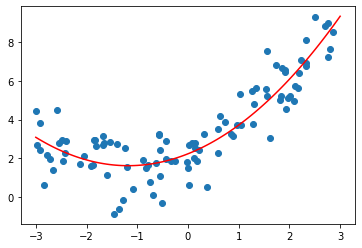

In [4]:
plt.plot(X, Y, 'o')
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = features.transform(X_new)
Y_new = linear.predict(X_new_poly)
plt.plot(X_new, Y_new, 'r-')
plt.show()

## Overfitting
Using too many degrees overfits the data

In [5]:
features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = features.fit_transform(X)
linear = LinearRegression()
linear.fit(X_poly, Y)
print(linear.intercept_, linear.coef_)

[2.03477158] [[ 7.55941124e-01  8.26545139e-01  1.27583657e+00 -1.37740283e-01
  -7.25129085e-01  1.51838115e-02  1.32918454e-01  1.55829638e-03
  -7.70009287e-03 -2.72345710e-04]]


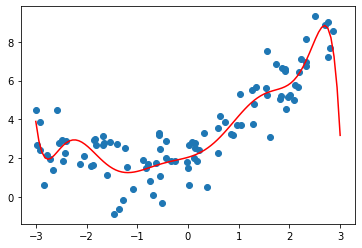

In [6]:
plt.plot(X, Y, 'o')
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = features.transform(X_new)
Y_new = linear.predict(X_new_poly)
plt.plot(X_new, Y_new, 'r-')
plt.show()

## 3 degrees

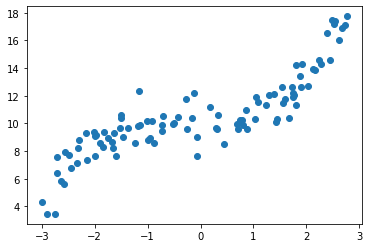

In [7]:
X2 = 6 * np.random.rand(100, 1) - 3
Y2 = 0.3 * X2**3 + 0.2 * X2**2 + 10 + np.random.randn(100, 1)
plt.plot(X2, Y2, 'o')

[9.9683191] [[0.02788582 0.24418078 0.29286331]]


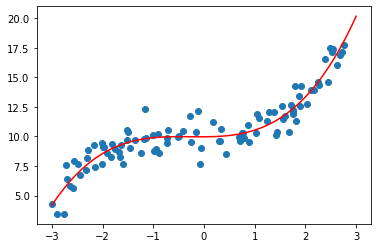

In [8]:
features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = features.fit_transform(X2)
linear = LinearRegression()
linear.fit(X_poly, Y2)
print(linear.intercept_, linear.coef_)
plt.plot(X2, Y2, 'o')
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = features.transform(X_new)
Y_new = linear.predict(X_new_poly)
plt.plot(X_new, Y_new, 'r-')
plt.show()

[1.73536087] [[0.77810333 0.50264275 0.03197737]]
[1.98226448] [0.15489378 0.43191717 0.11769332]


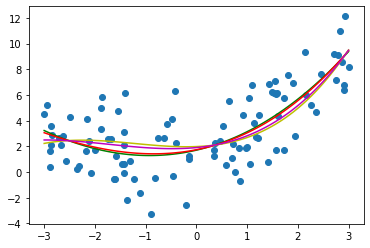

In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
X = 6 * np.random.rand(100, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2
features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = features.fit_transform(X)
plt.plot(X, Y, 'o')
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = features.transform(X_new)
linear = LinearRegression()
linear.fit(X_poly, Y)
Y_new = linear.predict(X_new_poly)
plt.plot(X_new, Y_new, 'g-')

# Ridge Regression (l2)
ridge = Ridge(alpha=10)
ridge.fit(X_poly, Y)
print(ridge.intercept_, ridge.coef_)
Y_new = ridge.predict(X_new_poly)
plt.plot(X_new, Y_new, 'r-')

# Lasso Regression (l1)
lasso = Lasso(alpha=.5)
lasso.fit(X_poly, Y)
print(lasso.intercept_, lasso.coef_)
Y_new = lasso.predict(X_new_poly)
plt.plot(X_new, Y_new, 'y-')

# Elastic Net (between l1 & l2)
elastic = ElasticNet(alpha=.5, l1_ratio=0.5)
elastic.fit(X_poly, Y)
Y_new = elastic.predict(X_new_poly)
plt.plot(X_new, Y_new, 'm-')
plt.show()